<a href="https://colab.research.google.com/github/Rizkifadillah/googlecolab/blob/main/OnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connect colab to drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_excel(io='/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/Online Retail.xlsx')

In [ ]:
# melihat banyaknya data dan kolom 
df.shape

(541909, 8)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Product Analytics

**1.Quantity Distribution**

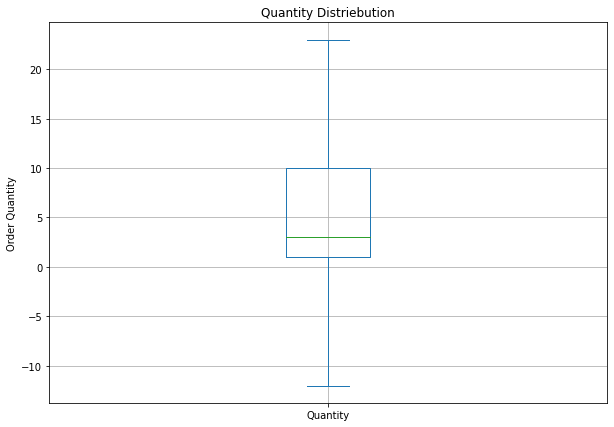

In [ ]:
# mengetahui banyaknya product yang terjual

ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10,7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distriebution')

plt.suptitle("")
plt.show()

Dari grafik diatas barang dengan quantity yg terjual paling banyak dari 0 keatas sampai dengan 10, dan ada yg membeli dengan min -10 dan max 20 ketas

Dan yang minus ini yg harus kita analisa kenapa ada orang yg membeli dengan quantity -10 
, Bisa jadi ini product yg di cancel atau refund

In [ ]:
# melihat description data quantity
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [ ]:
# cek berapa data quantity dengan quantity di atas 0
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [ ]:
# bandingkan dengan seluruh data
df.shape

(541909, 8)

In [ ]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483194,577495,21365,MIRRORED WALL ART STARS,2,2011-11-20 12:20:00,0.75,14704.0,United Kingdom
238465,557938,35970,ZINC FOLKART SLEIGH BELLS,1,2011-06-23 15:35:00,4.13,NaN,United Kingdom
429673,573576,21892,TRADITIONAL WOODEN CATCH CUP GAME,8,2011-10-31 14:09:00,2.46,14096.0,United Kingdom
437507,574297,22456,NATURAL SLATE CHALKBOARD LARGE,3,2011-11-03 15:54:00,4.95,16602.0,United Kingdom
56833,C541117,21258,VICTORIAN SEWING BOX LARGE,-3,2011-01-13 17:09:00,10.95,15100.0,United Kingdom
253935,559202,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2011-07-07 10:40:00,4.95,13583.0,United Kingdom
239550,C558059,82600,NO SINGING METAL SIGN,-2,2011-06-24 15:03:00,1.85,14194.0,United Kingdom
437353,574287,90161B,ANT COPPER TURQ BOUDICCA BRACELET,2,2011-11-03 15:09:00,4.95,14723.0,United Kingdom
449724,575138,22781,GUMBALL MAGAZINE RACK,2,2011-11-08 15:24:00,14.96,NaN,United Kingdom
457366,575739,22464,HANGING METAL HEART LANTERN,1,2011-11-11 09:05:00,3.29,NaN,United Kingdom


In [ ]:
# hanya mengambil data yg quantitynya di atas 0
df = df[df['Quantity'] > 0]

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.shape

(531285, 8)

**2.Time-series Number of Orders**

In [ ]:
#  menghitung banyaknya invoice number / banyaknya transaksi yg dilakukan setiap bulannya
mounthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [ ]:
mounthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

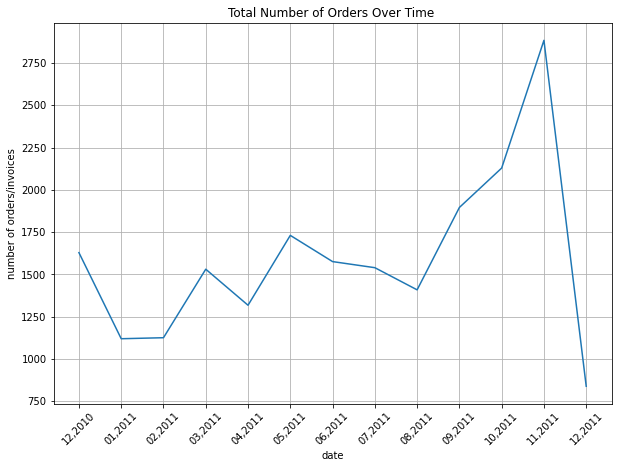

In [ ]:
# cek grafik yg terjadi
ax = pd.DataFrame(mounthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time ')

plt.xticks(
    range(len(mounthly_orders_df.index)),
    [x.strftime('%m,%Y') for x in mounthly_orders_df.index],
    rotation=45
)

plt.show()

In [ ]:
# cek kenapa di bulan 12 tahun 2011 datanya menurun drastis
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [ ]:
invoice_dates

516403   2011-12-01 08:33:00
516404   2011-12-01 08:33:00
516405   2011-12-01 08:33:00
516406   2011-12-01 08:33:00
516407   2011-12-01 08:33:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 25135, dtype: datetime64[ns]

In [ ]:
print('Min date: %s \nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00 
Max date: 2011-12-09 12:50:00


In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df.sample(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
459527,575875,22928,YELLOW GIANT GARDEN THERMOMETER,2,2011-11-11 13:06:00,12.46,NaN,United Kingdom
233723,557484,85014B,RED RETROSPOT UMBRELLA,1,2011-06-20 14:36:00,5.95,14796.0,United Kingdom
483882,577511,23504,PLAYING CARDS JUBILEE UNION JACK,3,2011-11-20 12:53:00,1.25,17561.0,United Kingdom
367634,568900,22751,FELTCRAFT PRINCESS OLIVIA DOLL,4,2011-09-29 13:21:00,3.75,13647.0,United Kingdom
143874,548714,22972,CHILDREN'S SPACEBOY MUG,1,2011-04-03 15:07:00,1.65,17337.0,United Kingdom
424537,573270,23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS,4,2011-10-28 13:00:00,3.75,17418.0,United Kingdom
456110,575671,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,12,2011-11-10 15:03:00,2.10,12670.0,France
397414,571183,23309,SET OF 60 I LOVE LONDON CAKE CASES,24,2011-10-14 11:08:00,0.55,14796.0,United Kingdom
364834,568674,21670,BLUE SPOT CERAMIC DRAWER KNOB,12,2011-09-28 13:30:00,1.45,12708.0,Germany
444345,574726,23227,FILIGREE HEART BUTTERFLY WHITE,6,2011-11-06 14:56:00,1.25,14664.0,United Kingdom


In [ ]:
df.shape

(506150, 8)

In [ ]:
mounthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [ ]:
mounthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

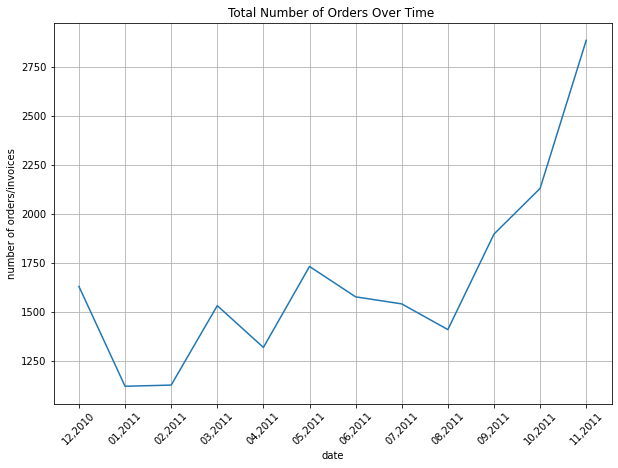

In [ ]:
# cek grafik yg terjadi
ax = pd.DataFrame(mounthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time ')

plt.xticks(
    range(len(mounthly_orders_df.index)),
    [x.strftime('%m,%Y') for x in mounthly_orders_df.index],
    rotation=45
)

plt.show()

**3.Time-series Revenue**

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

<ipython-input-28-b3761472ad58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


In [ ]:
mounthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [ ]:
mounthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

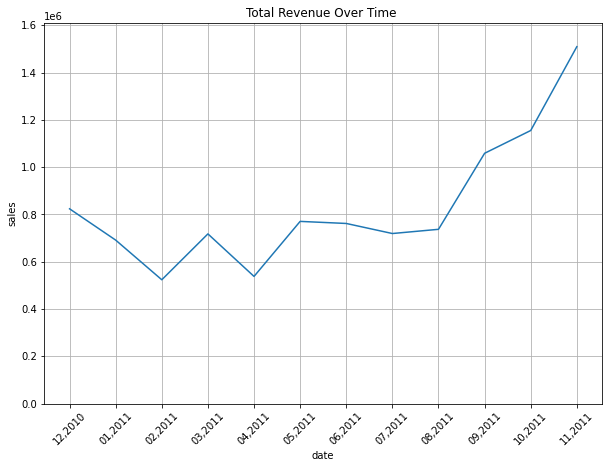

In [ ]:
# cek grafik yg terjadi
ax = pd.DataFrame(mounthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time ')

ax.set_ylim([0, max(mounthly_revenue_df.values)+100000])

plt.xticks(
    range(len(mounthly_revenue_df.index)),
    [x.strftime('%m,%Y') for x in mounthly_revenue_df.index],
    rotation=45
)

plt.show()

**4.Time-series Repeat Customer**

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95


In [ ]:
df.shape

(506150, 9)

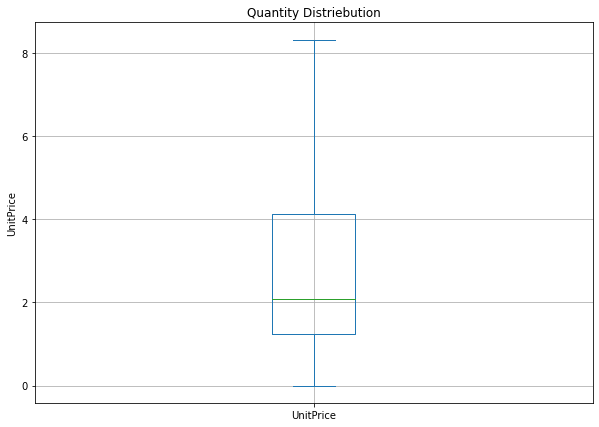

In [ ]:
ax = df['UnitPrice'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10,7)
)

ax.set_ylabel('UnitPrice')
ax.set_title('Quantity Distriebution')

plt.suptitle("")
plt.show()

In [ ]:
# grouping data customer berdasarkan InvoiceDate
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [ ]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


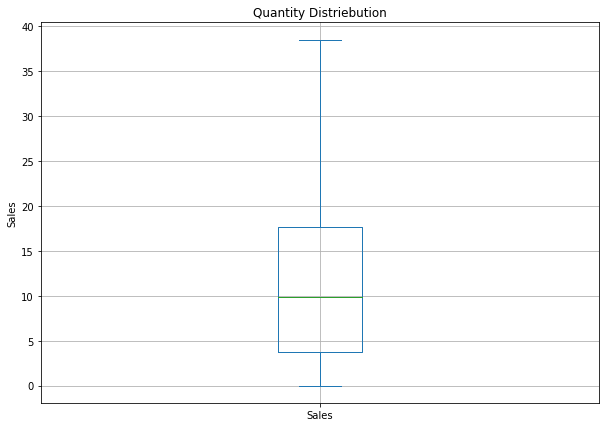

In [ ]:
ax = df['Sales'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10,7)
)

ax.set_ylabel('Sales')
ax.set_title('Quantity Distriebution')

plt.suptitle("")
plt.show()

In [ ]:
# filter untuk menghitung jumlah customer yg membeli product tiap bulannya
mounthly_repeat_customer_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'),'CustomerID'
]).filter(lambda x:len(x) > 1).resample('M').nunique()['CustomerID']

In [ ]:
mounthly_repeat_customer_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# mengetahui data customer yg membeli berulang
mounthly_unique_customer_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [ ]:
mounthly_unique_customer_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# mengtahui persentase
mounthly_repeat_percentage = mounthly_repeat_customer_df / mounthly_unique_customer_df * 100.0

In [ ]:
mounthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

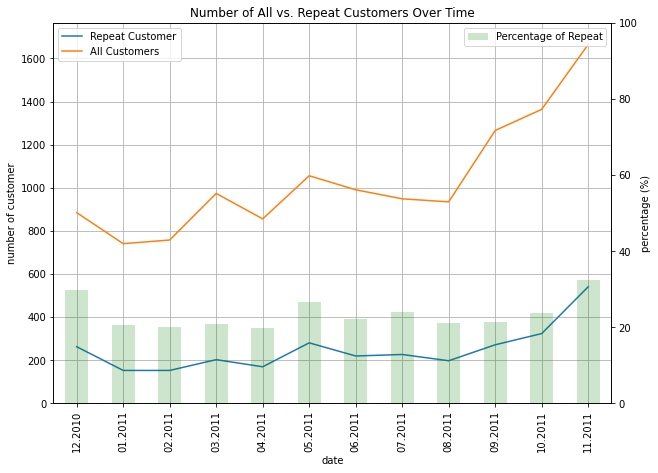

In [ ]:
ax = pd.DataFrame(mounthly_repeat_customer_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(mounthly_unique_customer_df.values).plot(
    ax=ax,
    grid=True
)

ax2 = pd.DataFrame(mounthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customer')
ax.set_title("Number of All vs. Repeat Customers Over Time")

ax2.set_ylabel('percentage (%)')
ax.legend(['Repeat Customer', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, mounthly_unique_customer_df.values.max()+100])
ax2.set_ylim([0,100])

plt.xticks(
    range(len(mounthly_repeat_customer_df.index)),
    [x.strftime('%m.%Y') for x in mounthly_repeat_customer_df.index],
    rotation=45
)

plt.show()

**5.Revenue from Repeat Customers**

In [ ]:
# menganalisa banyaknya revenue/keuntungan yg dihasilkan dari customer yg melakukan pembelian berulang
mounthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq="M"), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

In [ ]:
mounthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

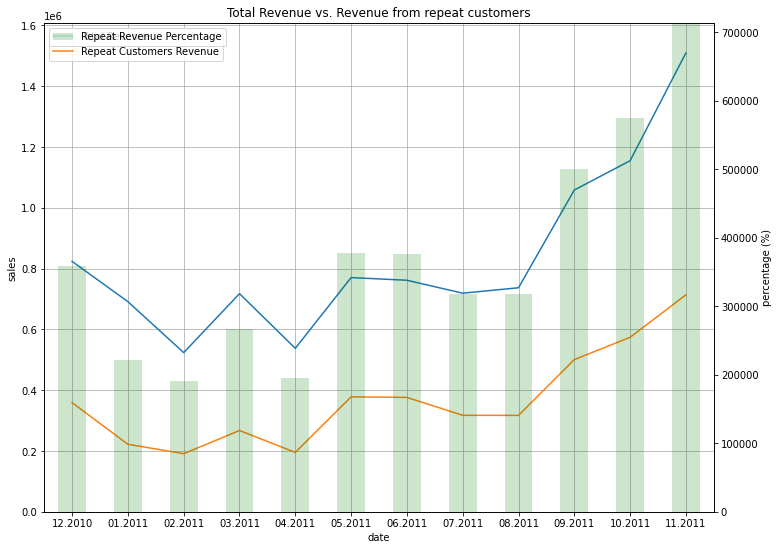

In [ ]:
ax = pd.DataFrame(mounthly_revenue_df.values).plot(
    figsize=(12,9)
)

pd.DataFrame(mounthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title("Total Revenue vs. Revenue from repeat customers")

ax.legend(['Total Revenue', 'Repeat Customers Revenue'])

ax.set_ylim([0, max(mounthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(mounthly_rev_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='green',
    alpha=0.2
)

ax2.set_ylim([0, max(mounthly_rev_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in mounthly_rev_repeat_customers_df.index
])

plt.show()

**6.Popular Items Over Time**

In [ ]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

In [ ]:
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [ ]:
# Rang items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

In [ ]:
last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [ ]:
#Regroup for top 5 items 
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084,84826,22197,22086,'85099B'])
    ].set_index('InvoiceDate').groupby([
      pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

In [ ]:
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [ ]:
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)

In [ ]:
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


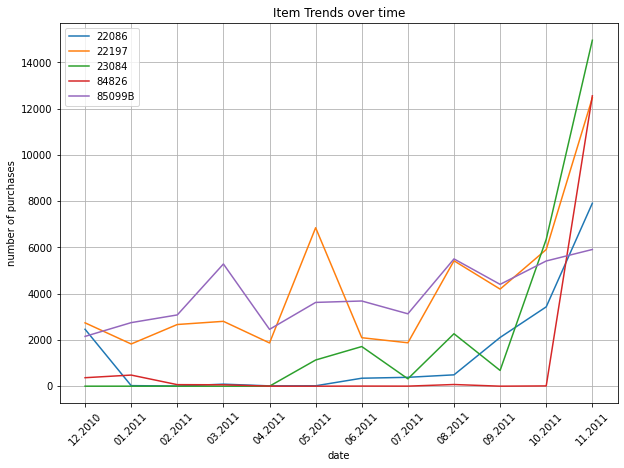

In [ ]:
ax = pd.DataFrame(trending_items_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m.%Y') for x in trending_items_df.index],
    rotation=45
)

plt.show()